In [66]:
# git clone https://github.com/alsinmr/pyRelaxSim.git
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync')
sys.path.append('/Users/albertsmith/Documents/GitHub')
import pyRelaxSim as RS
import numpy as np
from numpy import pi
RS.Defaults['parallel']=False
RS.Defaults['rtype']=np.float64
RS.Defaults['ctype']=np.complex128

In [67]:
%matplotlib notebook

In [68]:
ex=[RS.ExpSys(v0H=600,Nucs=['15N','1H'],pwdavg=RS.PowderAvg('alpha0beta0'),n_gamma=1)]
ex[0].set_inter(Type='CS',i=0,ppm=0)
ex.extend([ex[0].copy(),ex[0].copy(),ex[0].copy()])
for ex0,beta,gamma in zip(ex,[0,109.47*pi/180,109.47*pi/180,109.47*pi/180],[0,0,2*pi/3,4*pi/3]):
    ex0.set_inter(Type='dipole',i0=0,i1=1,delta=22000,euler=[0,beta,gamma])
L=RS.Liouvillian(ex)

In [76]:
rho=RS.Rho(rho0='15Nx',detect='15Np',L=L)
rho._apodize=True
seq=RS.Sequence(L)
seq.add_channel('1H',t=[0,L.taur/2],v1=[0,0])
I=list()
tc0=np.logspace(-7,-3,3)
for tc in tc0:
    kex=(np.ones([4,4])-np.eye(4)*4)/(4*tc)
    L.kex=kex

    rho.clear()
    rho.DetProp(seq=seq,n=8192)
    I.append(rho.FT[0].real)

<IPython.core.display.Javascript object>


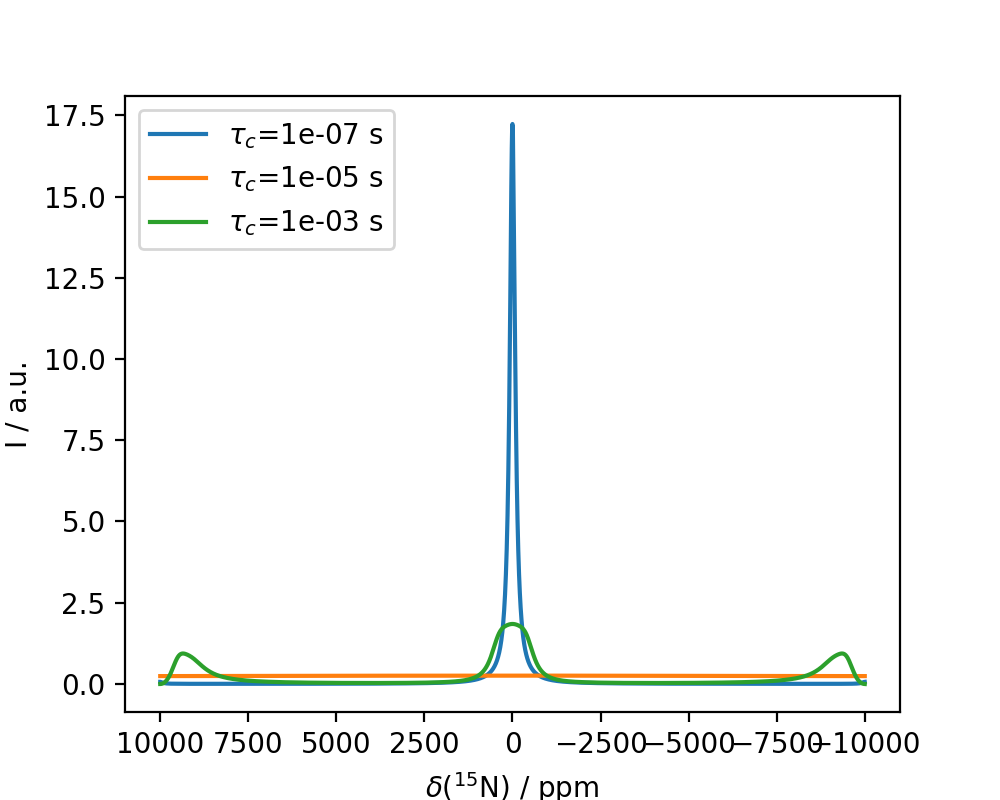

Text(0, 0.5, 'I / a.u.')

In [77]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches([5,4])
for I0 in I:
    ax.plot(rho.v_axis,I0)
ax.legend([r'$\tau_c$='+f'{tc:.0e} s' for tc in tc0],loc='upper left')

ax.invert_xaxis()
ax.set_xlabel(r'$\delta(^{15}$N) / ppm')
ax.set_ylabel('I / a.u.')


In [27]:
help(rho.DetProp)

Help on method DetProp in module pyRelaxSim.Rho:

DetProp(U=None, seq=None, n: int = 1) method of pyRelaxSim.Rho.Rho instance
    Executes a series of propagation/detection steps. Detection occurs first,
    followed by propagation for n steps. If n>100, then we will use
    eigenvalue decomposition for the propagation
    
    Parameters
    ----------
    U : Propagator
        Propagator applied. Should be an integer number of rotor periods
    n : int, optional
        Number of steps. The default is 1.
    
    Returns
    -------
    self

